# **1. Perkenalan Dataset**


1. **Sumber Dataset**

   
Dataset yang digunakan dalam proyek ini merupakan kombinasi dari dua dataset publik, yaitu Customer Personality Analysis dan Shop Customer Data, yang diperoleh dari platform Kaggle. Dataset ini dirancang untuk memberikan gambaran tentang karakteristik pelanggan serta kebiasaan berbelanja mereka.

2. **Tujuan Dataset**

   
Dataset ini akan digunakan untuk melakukan proses clustering dalam rangka mengelompokkan pelanggan berdasarkan karakteristiknya. Hasil clustering tersebut nantinya akan digunakan sebagai label untuk tahap supervised learning.

3. **Deskripsi Dataset**

   
Dataset gabungan ini memiliki 2.520 baris data yang terdiri dari atribut numerik dan kategorikal. Berikut adalah rincian atribut yang terdapat dalam dataset ini:

1. Atribut Numerik:

- Income: Pendapatan tahunan pelanggan (dalam satuan mata uang tertentu).
- Age: Usia pelanggan (dalam tahun).
- Spending Score: Skor pengeluaran pelanggan (dalam skala 0–100).
- Family Size: Jumlah anggota keluarga.
  
2. Atribut Kategorikal:

- Gender: Jenis kelamin pelanggan (Male/Female).
- Education: Tingkat pendidikan pelanggan (e.g., Graduate, PhD, High School).
- Marital Status: Status pernikahan pelanggan (e.g., Single, Married, Divorced).
- Employment Status: Status pekerjaan pelanggan (e.g., Employed, Unemployed).
- Preferred Channel: Kanal yang sering digunakan pelanggan untuk berbelanja (e.g., Online, Offline).
  
4. **Kelebihan Dataset**
   
- Tanpa Label: Dataset ini tidak memiliki label awal, sehingga cocok untuk tahap clustering sebagai langkah pertama dalam proyek machine learning.
- Bervariasi: Dataset mencakup data numerik dan kategorikal, memungkinkan eksplorasi analisis yang lebih komprehensif.
- Relevansi: Dataset ini relevan untuk studi segmentasi pelanggan, yang memiliki aplikasi nyata dalam berbagai sektor bisnis seperti pemasaran, manajemen pelanggan, dan personalisasi layanan.
   
5. **Pembatasan Dataset**

   
Dataset ini tidak boleh mengandung data yang digunakan dalam latihan clustering sebelumnya (misalnya, dataset khusus customer segmentation yang sudah ada dalam modul Dicoding). Oleh karena itu, dataset gabungan ini dipilih untuk memastikan orisinalitas dan mendukung kebutuhan proyek.

6. **Potensi Analisis**

   
Melalui eksplorasi dataset ini, kita dapat:

- Mengidentifikasi pola perilaku pelanggan berdasarkan karakteristik mereka.
- Mengelompokkan pelanggan ke dalam segmen berdasarkan kemiripan atribut.
- Memberikan insight bagi strategi pemasaran yang lebih terarah, seperti personalisasi penawaran berdasarkan segmen pelanggan.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
dataset = pd.read_csv('Combined_Dataset.csv')
dataset.head()


,Customer ID,Age,Annual Income,Family Size,Education,Marital Status,Gender,Spending Score,Profession,Work Experience
0,5524,67,58138.0,0,Graduation,Single,NaN,NaN,NaN,NaN
1,2174,70,46344.0,2,Graduation,Single,NaN,NaN,NaN,NaN
2,4141,59,71613.0,0,Graduation,Together,NaN,NaN,NaN,NaN
3,6182,40,26646.0,1,Graduation,Together,NaN,NaN,NaN,NaN
4,5324,43,58293.0,1,PhD,Married,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Periksa struktur data dan tipe data

In [133]:
dataset.info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      3846 non-null   int64  
 1   Age              3846 non-null   int64  
 2   Annual Income    3822 non-null   float64
 3   Family Size      3846 non-null   int64  
 4   Education        2240 non-null   object 
 5   Marital Status   2240 non-null   object 
 6   Gender           1606 non-null   object 
 7   Spending Score   1606 non-null   float64
 8   Profession       1576 non-null   object 
 9   Work Experience  1606 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 300.6+ KB


,Customer ID,Age,Annual Income,Family Size,Spending Score,Work Experience
count,3846.000000,3846.000000,3822.000000,3846.000000,1606.000000,1606.00000
mean,3674.685647,52.675767,77031.001570,2.119605,51.264010,4.05604
std,3377.566085,20.811425,45671.268597,1.963846,27.917927,3.96723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,961.250000,41.000000,43786.000000,1.000000,28.000000,1.00000
50%,1922.500000,53.000000,66995.500000,1.000000,51.000000,3.00000
75%,6261.750000,67.000000,96528.250000,3.000000,76.000000,7.00000
max,11191.000000,131.000000,666666.000000,9.000000,100.000000,17.00000


#### Identifikasi missing values

In [134]:
dataset.isnull().sum()


Customer ID           0
Age                   0
Annual Income        24
Family Size           0
Education          1606
Marital Status     1606
Gender             2240
Spending Score     2240
Profession         2270
Work Experience    2240
dtype: int64

#### Analisis distribusi data

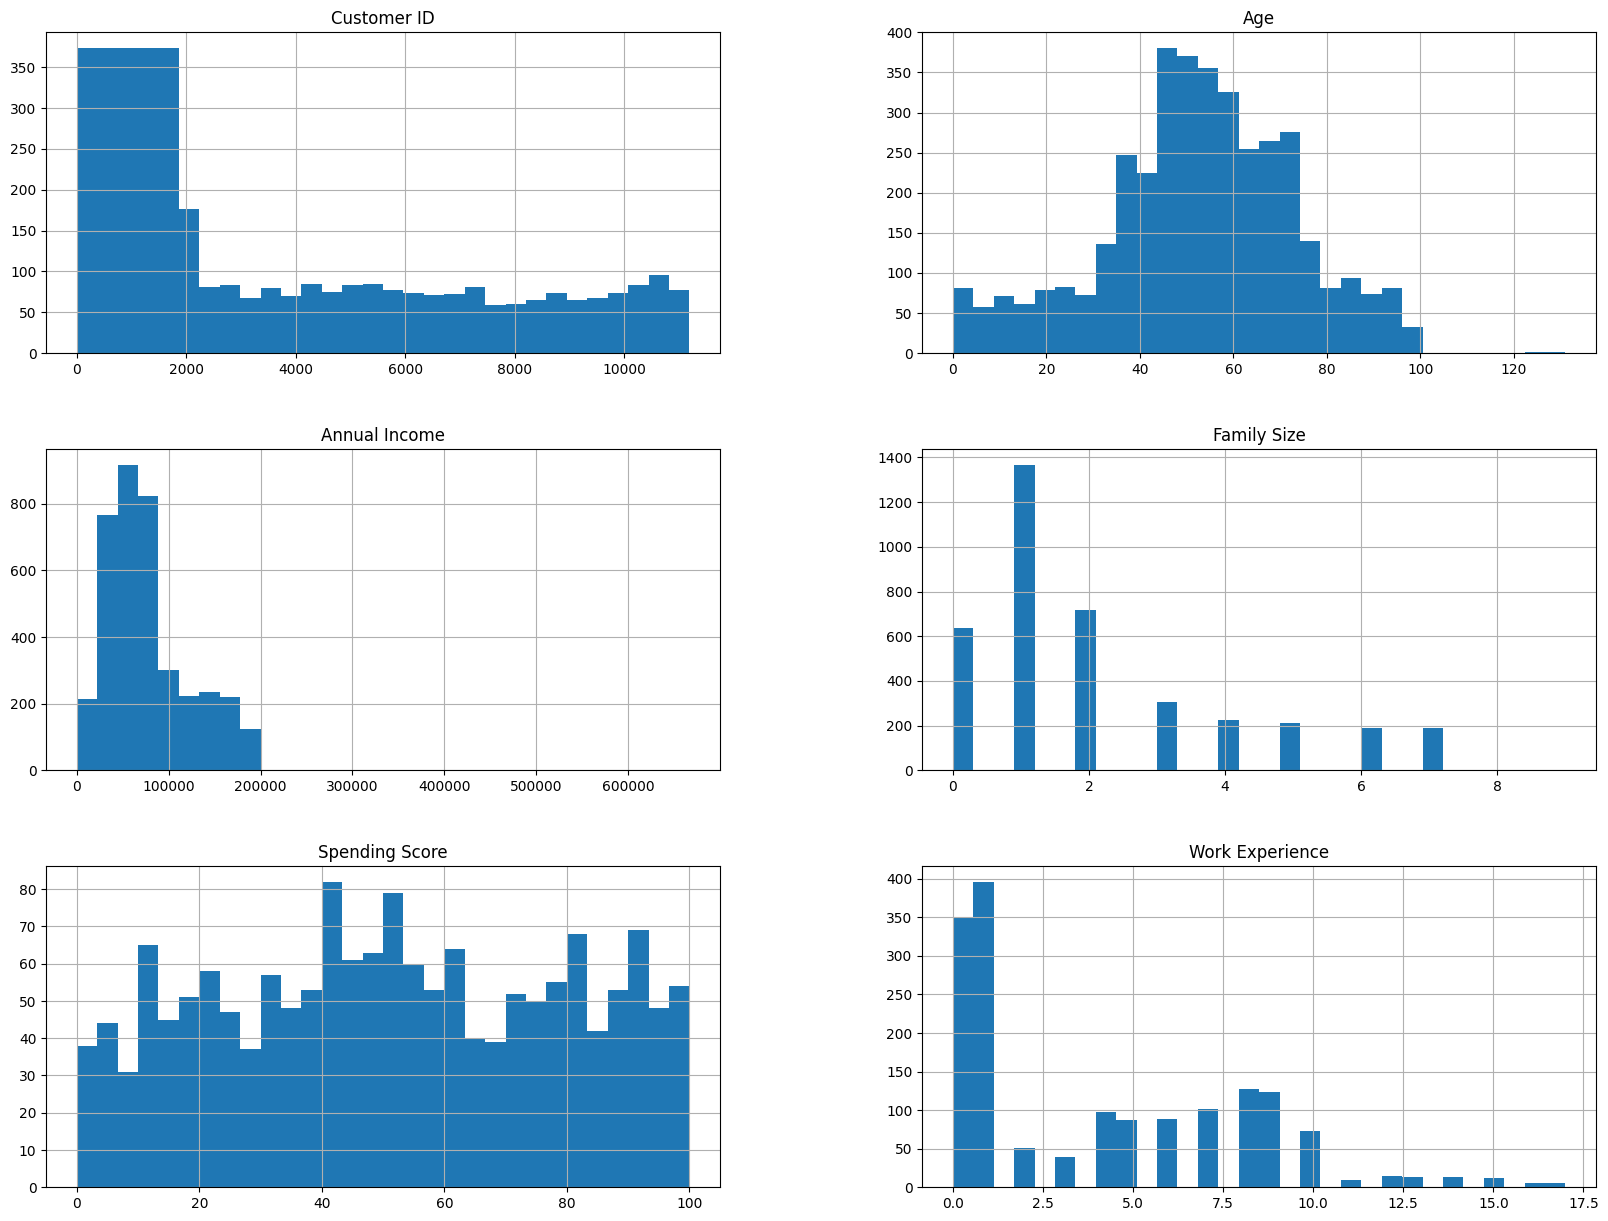

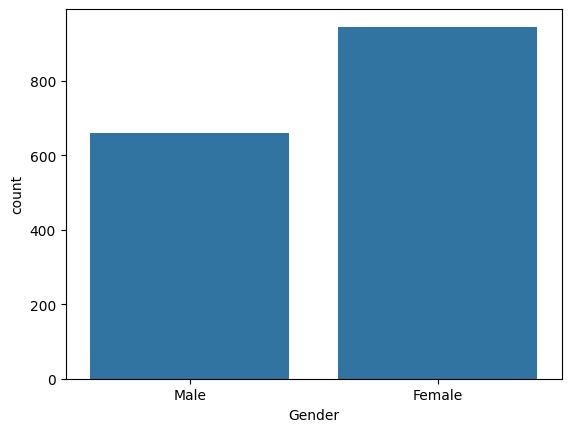

In [135]:
# Visualisasi distribusi data numerik
dataset.hist(bins=30, figsize=(20, 15))
plt.show()

# Analisis data kategorikal
sns.countplot(x='Gender', data=dataset)
plt.show()

#### Analisis korelasi (numerik)

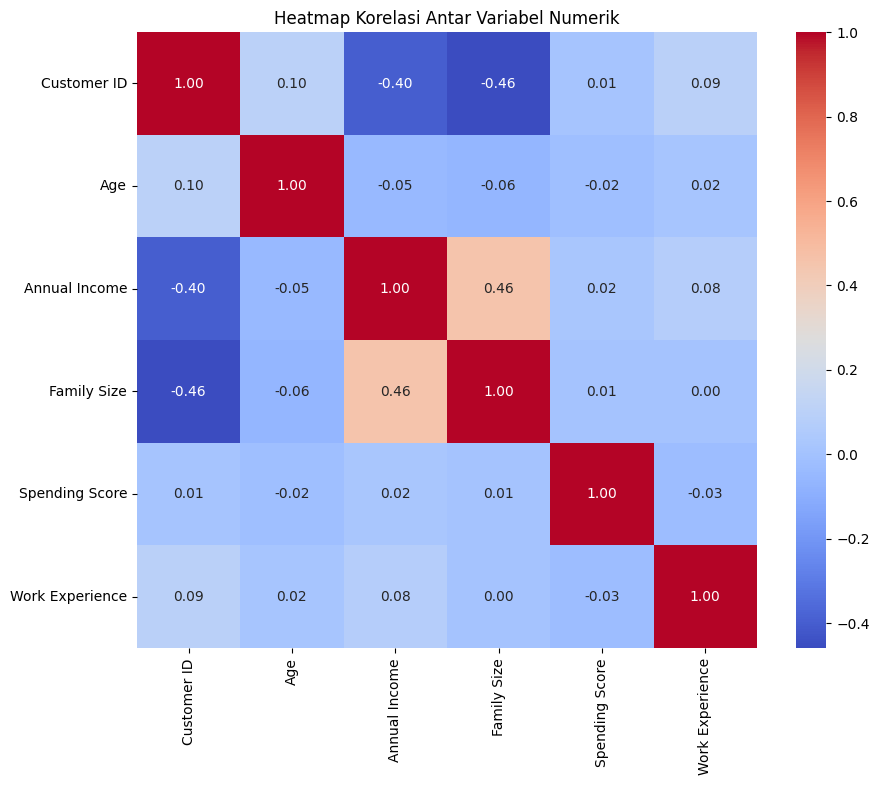

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik dari dataset
numerical_columns = dataset.select_dtypes(include=['number'])

# Menghitung korelasi
correlation_matrix = numerical_columns.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### 1. Menangani Missing Values

In [137]:
# Mengisi missing values untuk kolom numerik
numerical_columns = ['Annual Income', 'Spending Score', 'Work Experience']
for col in numerical_columns:
    dataset[col] = dataset[col].fillna(dataset[col].mean())  # Mengisi dengan mean

# Mengisi missing values untuk kolom kategorikal
categorical_columns = ['Education', 'Marital Status', 'Gender', 'Profession']
for col in categorical_columns:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])  # Mengisi dengan mode (nilai terbanyak)


#### 2. Menghapus Data Duplikat

In [138]:
# Menghapus data duplikat
dataset = dataset.drop_duplicates()

#### 3. Normalisasi atau Standarisasi Fitur

In [139]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi kolom numerik
scaler = MinMaxScaler()
numerical_columns = ['Annual Income', 'Spending Score', 'Work Experience']
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

#### 4. Deteksi dan Penanganan Outlier

In [140]:
# Menghapus outlier menggunakan IQR
for col in numerical_columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Memfilter data
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

#### 5. Encoding Data Kategorikal

In [141]:
# One-Hot Encoding untuk kolom kategorikal
categorical_columns = ['Education', 'Marital Status', 'Gender', 'Profession']
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)


#### 6. Binning (Pengelompokan Data)

In [142]:
# Membuat bin pada kolom Age
bins = [0, 18, 30, 45, 60, 100]  # Rentang usia
labels = ['Teenager', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

# Encoding kolom Age Group
dataset = pd.get_dummies(dataset, columns=['Age Group'], drop_first=True)


#### 7. Memeriksa Dataset Akhir

In [143]:
# Memeriksa informasi dataset
print(dataset.info())

# Menampilkan beberapa baris pertama dataset
print(dataset.head())

# Memastikan tidak ada missing values
print("Jumlah missing values:", dataset.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer ID              2239 non-null   int64  
 1   Age                      2239 non-null   int64  
 2   Annual Income            2239 non-null   float64
 3   Family Size              2239 non-null   int64  
 4   Spending Score           2239 non-null   float64
 5   Work Experience          2239 non-null   float64
 6   Education_Basic          2239 non-null   bool   
 7   Education_Graduation     2239 non-null   bool   
 8   Education_Master         2239 non-null   bool   
 9   Education_PhD            2239 non-null   bool   
 10  Marital Status_Alone     2239 non-null   bool   
 11  Marital Status_Divorced  2239 non-null   bool   
 12  Marital Status_Married   2239 non-null   bool   
 13  Marital Status_Single    2239 non-null   bool   
 14  Marital Status_Together  2239

# **6. Pembangunan Model Clustering**

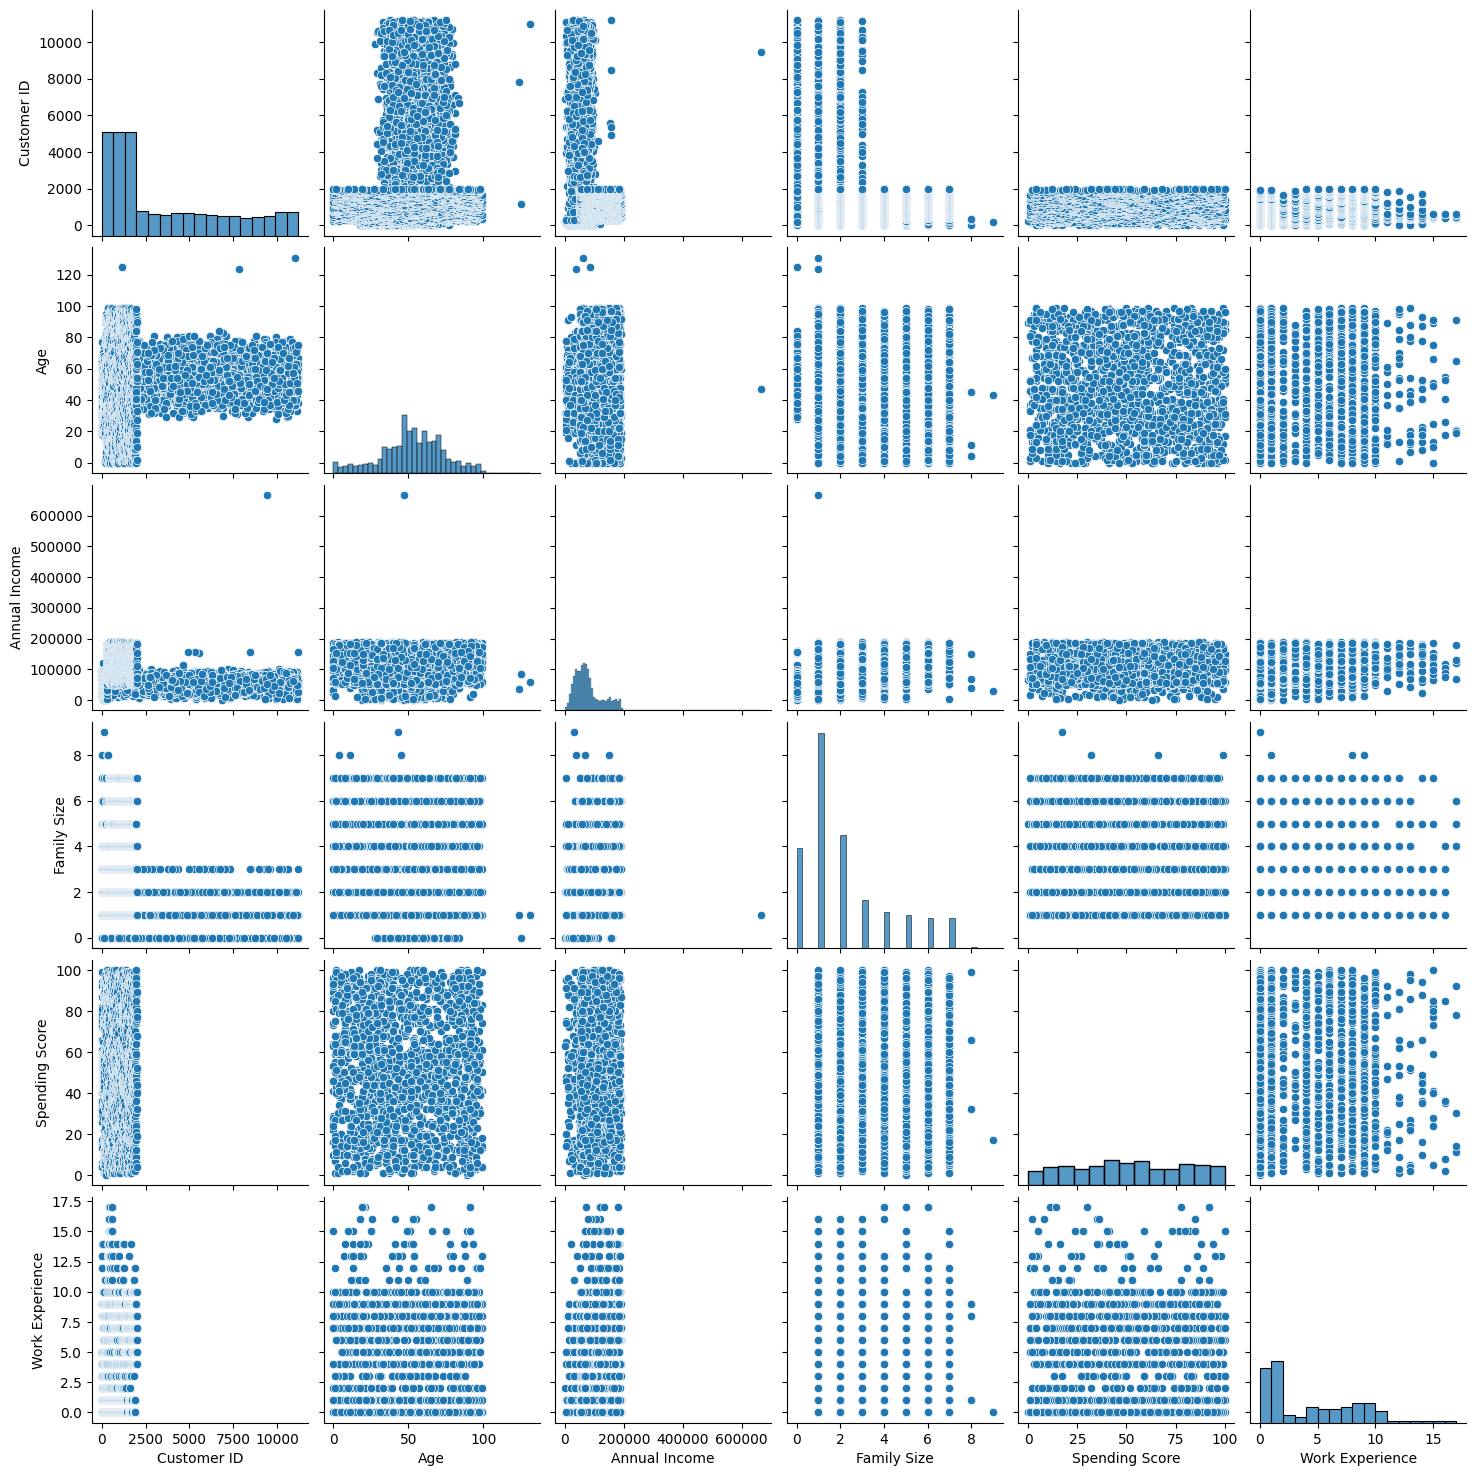

In [6]:

# Visualisasi distribusi data menggunakan pairplot atau heatmap
sns.pairplot(dataset)
plt.show()



**Insight**

Jika data tidak menunjukkan pemisahan alami, ini bisa menjadi tanda bahwa clustering tidak akan memberikan hasil yang baik.

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

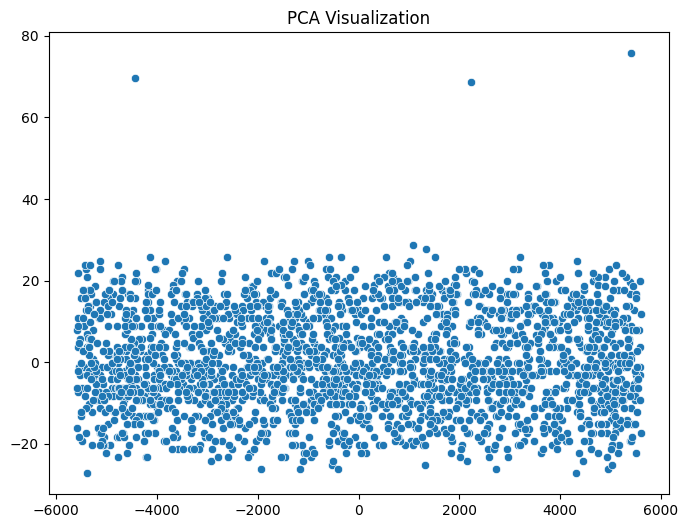

In [145]:

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset)

# Visualisasi dengan PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_pca[:, 0], y=dataset_pca[:, 1])
plt.title('PCA Visualization')
plt.show()


In [146]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(dataset)

# Filter data tanpa outliers
dataset_no_outliers = dataset[outliers == 1]


In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)


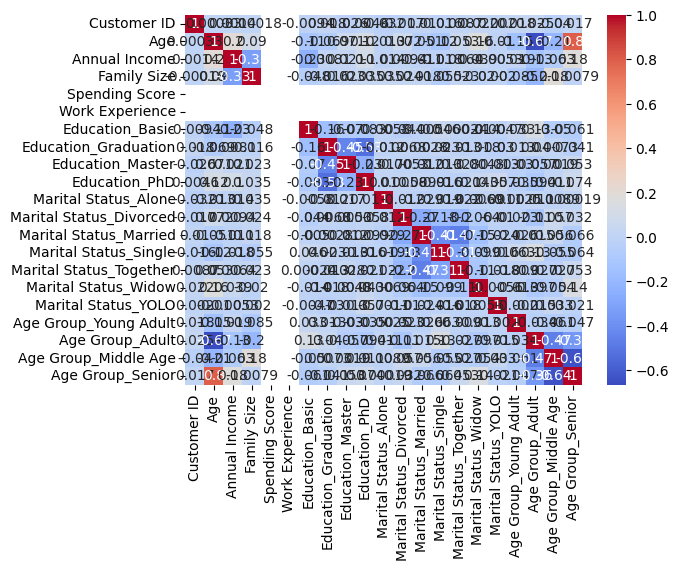

In [148]:
# Visualisasi korelasi antar fitur
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


Silhouette Score untuk k=3: 0.044230193125967


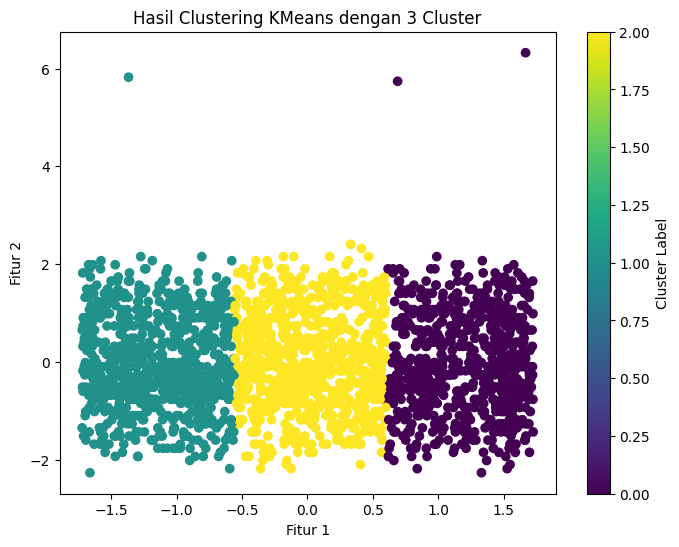

In [151]:

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Latih model clustering
if 'Cluster' in dataset.columns:
    cluster_labels = kmeans.fit_predict(dataset.drop('Cluster', axis=1))
else:
    cluster_labels = kmeans.fit_predict(dataset)


# Menambahkan label cluster ke dataset
dataset['Cluster'] = cluster_labels

# Hitung silhouette score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score untuk k={k}: {silhouette_avg}")

# Visualisasi hasil clustering (2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title(f'Hasil Clustering KMeans dengan {k} Cluster')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.colorbar(label='Cluster Label')
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

#### 1. Gunakan Elbow Method
Elbow Method membantu kita untuk memilih jumlah cluster yang optimal berdasarkan inertia (jumlah jarak kuadrat antara titik data dan pusat cluster). Biasanya, kita mencari "siku" pada grafik inertia yang menunjukkan titik perubahan besar pada penurunan inertia.

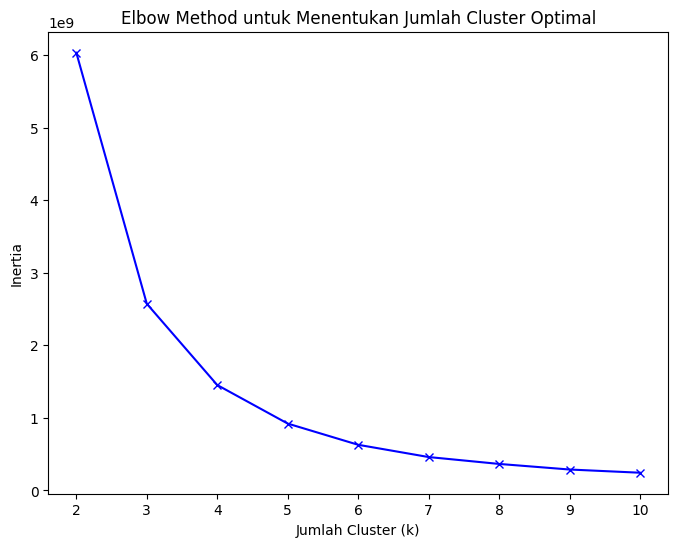

In [152]:
# Menggunakan Elbow Method

inertia = []
k_values = range(2, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()



#### 2. Hitung Silhouette Score
Untuk mengevaluasi kualitas cluster.

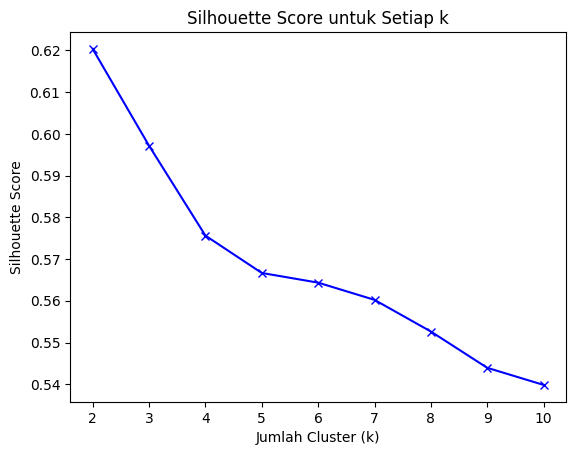

Jumlah cluster optimal berdasarkan Silhouette Score adalah 2 dengan nilai Silhouette Score = 0.6203
Silhouette Score untuk k=2: 0.6203449103400809
Silhouette Score untuk k=3: 0.5971427893555092
Silhouette Score untuk k=4: 0.5756142145851625
Silhouette Score untuk k=5: 0.5666640338154678
Silhouette Score untuk k=6: 0.5643445124074034
Silhouette Score untuk k=7: 0.5602200874045212
Silhouette Score untuk k=8: 0.5526322335847685
Silhouette Score untuk k=9: 0.5439391480902083
Silhouette Score untuk k=10: 0.5398407088821932


In [153]:
silhouette_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(dataset)
    score = silhouette_score(dataset, cluster_labels)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap k')
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f'Jumlah cluster optimal berdasarkan Silhouette Score adalah {best_k} dengan nilai Silhouette Score = {best_score:.4f}')

# Menampilkan Silhouette Score untuk setiap jumlah cluster k
for k in k_values:
    print(f"Silhouette Score untuk k={k}: {silhouette_scores[k-2]}")



## **c. Feature Selection (Opsional)**

Feature Selection adalah proses memilih subset dari fitur-fitur yang paling relevan dan berpengaruh dalam model machine learning. Pada clustering, ini bisa membantu mengurangi kompleksitas model dan meningkatkan kinerja. Salah satu teknik yang populer untuk memilih fitur adalah Principal Component Analysis (PCA).

PCA (Principal Component Analysis): PCA digunakan untuk mereduksi dimensi dataset dengan mengubah fitur-fitur asli menjadi komponen baru yang lebih sedikit, namun tetap mempertahankan sebagian besar informasi dari dataset. Tujuannya adalah untuk mengurangi jumlah fitur tanpa kehilangan terlalu banyak informasi.

Langkah-langkah:
- Menggunakan PCA, kita mengubah data menjadi dua komponen utama (PCA1, PCA2), yang mewakili variasi terbesar dalam data.
- Hasil dari PCA ini sering digunakan untuk memvisualisasikan data atau menyederhanakan data sebelum digunakan dalam model clustering.


In [154]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(dataset)

# Update dataset dengan hasil PCA
dataset['PCA1'] = pca_result[:, 0]
dataset['PCA2'] = pca_result[:, 1]


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Setelah membangun model clustering, penting untuk memvisualisasikan hasilnya agar dapat memahami bagaimana data dikelompokkan. Biasanya, visualisasi ini dilakukan dalam dua dimensi (2D) menggunakan komponen utama yang dihasilkan dari PCA atau fitur yang dipilih.

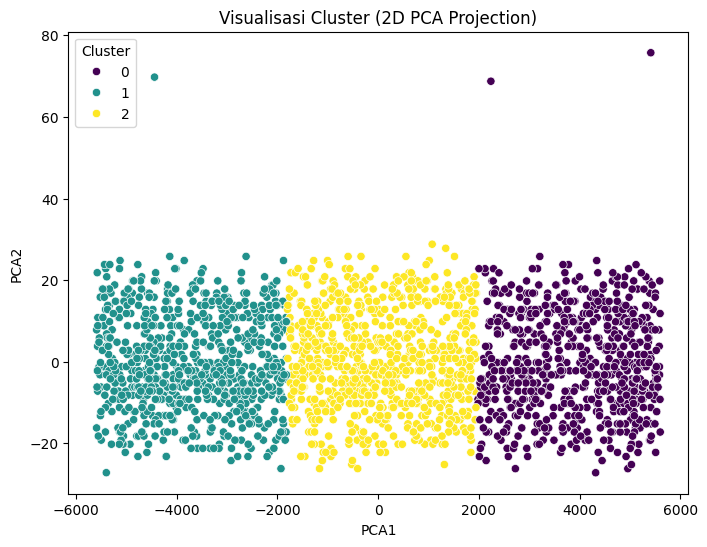

In [155]:
# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',  # Gunakan komponen PCA untuk visualisasi
    hue='Cluster',  # Warnai berdasarkan cluster
    palette='viridis', 
    data=dataset
)
plt.title('Visualisasi Cluster (2D PCA Projection)')
plt.show()


**insight**

Pada visualisasi ini, setiap titik mewakili satu data point, dan warna yang berbeda menunjukkan cluster yang berbeda. Ini memberi gambaran yang jelas tentang bagaimana data terbagi ke dalam cluster-cluster yang telah terbentuk oleh model K-Means.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Setelah membangun model clustering, langkah berikutnya adalah untuk menganalisis karakteristik tiap cluster berdasarkan fitur yang tersedia, kemudian memberikan interpretasi mengenai hasil clustering tersebut.

##### 1. Analisis Karakteristik Tiap Cluster
Untuk menganalisis karakteristik tiap cluster, kita akan melihat distribusi nilai pada setiap fitur untuk masing-masing cluster. Ini memberikan wawasan tentang pola atau karakteristik yang membedakan setiap cluster.

Langkah-langkah Analisis:

- Melihat statistik deskriptif (rata-rata, median, standar deviasi) untuk masing-masing fitur dalam tiap cluster.
- Menghitung distribusi nilai untuk variabel numerik dan kategorikal (misalnya, distribusi usia, pendapatan, atau kategori pekerjaan).

In [156]:
# Analisis deskriptif tiap cluster
for cluster in dataset['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(dataset[dataset['Cluster'] == cluster].describe())  # Statistik deskriptif untuk fitur numerik
    print("\n")

    # Untuk fitur kategorikal, kita bisa melihat frekuensi distribusinya
    for column in dataset.select_dtypes(include=['object']).columns:
        print(f"Distribusi {column} pada Cluster {cluster}:")
        print(dataset[dataset['Cluster'] == cluster][column].value_counts())
        print("\n")


Cluster 2:
       Customer ID         Age  Annual Income  Family Size  Spending Score  \
count   781.000000  781.000000     781.000000   781.000000    7.810000e+02   
mean   5649.198464   55.823303       0.078790     0.957746    5.126401e-01   
std    1086.219536   11.820865       0.033058     0.762591    1.110934e-16   
min    3783.000000   29.000000       0.002595     0.000000    5.126401e-01   
25%    4702.000000   47.000000       0.052767     0.000000    5.126401e-01   
50%    5596.000000   55.000000       0.077814     1.000000    5.126401e-01   
75%    6566.000000   65.000000       0.104492     1.000000    5.126401e-01   
max    7540.000000   84.000000       0.236600     3.000000    5.126401e-01   

       Work Experience  Cluster         PCA1        PCA2  
count     7.810000e+02    781.0   781.000000  781.000000  
mean      2.385906e-01      2.0    58.753512    0.627804  
std       5.554672e-17      0.0  1086.219528   11.831411  
min       2.385906e-01      2.0 -1807.444923  -26.

**Insight**

1. Cluster 0:
* Jumlah Data: 701
* Karakteristik Umum:
    - Usia: Rata-rata 54.9 tahun, dengan rentang usia dari 28 hingga 131 tahun. Sama seperti cluster lainnya, cluster ini memiliki distribusi usia yang cukup luas.
    - Pendapatan Tahunan: Rata-rata pendapatan sedikit lebih tinggi (sekitar 0.078), dengan nilai yang cukup stabil, meskipun ada variasi.
    - Ukuran Keluarga: Keluarga kecil lebih dominan, mirip dengan cluster lain.
    - Skor Pengeluaran: Meskipun skor pengeluaran terlihat rendah (konstan di 0.51264), hal ini mungkin terkait dengan faktor luar seperti variabel yang tidak tercakup dalam analisis ini (misalnya, preferensi belanja atau pengeluaran untuk barang-barang tertentu).
    - Pengalaman Kerja: Pengalaman kerja rata-rata sama di seluruh cluster ini, mencerminkan stabilitas pekerjaan.

2. Cluster 1:
* Jumlah Data: 757
* Karakteristik Umum:
    - Usia: Rata-rata 54.8 tahun, dengan rentang usia dari 28 hingga 125 tahun. Meskipun ada beberapa nilai ekstrem (seperti usia 125 tahun), usia cluster ini cenderung lebih dewasa.
    -Pendapatan Tahunan: Nilai rata-rata pendapatan sedikit lebih tinggi dibandingkan Cluster 2 (sekitar 0.078), dengan nilai yang relatif stabil.
    -Ukuran Keluarga: Mirip dengan Cluster 2, kebanyakan memiliki ukuran keluarga kecil.
    -Skor Pengeluaran: Sekali lagi, sebagian besar pengeluaran cluster ini tidak terlalu tinggi, mirip dengan cluster lainnya.
    -Pengalaman Kerja: Tidak ada variasi yang signifikan dalam pengalaman kerja.

3. Cluster 2:
* Jumlah Data: 781
* Karakteristik Umum:
    - Usia: Rata-rata 55.8 tahun, dengan rentang usia antara 29 hingga 84 tahun.
    - Pendapatan Tahunan: Nilai rata-rata pendapatan relatif rendah (sekitar 0.078), namun memiliki variasi yang cukup besar.
    -Ukuran Keluarga: Mayoritas keluarga kecil, dengan beberapa keluarga besar (hingga 3 anggota).
    -Skor Pengeluaran: Sebagian besar cluster ini memiliki skor pengeluaran yang rendah, menunjukkan tingkat pengeluaran yang lebih terkontrol atau rendah.
    -Pengalaman Kerja: Pengalaman kerja cenderung seragam di seluruh cluster.

Tulis hasil interpretasinya di sini.

1. Cluster 0:
   Cluster ini bisa mencerminkan kelompok usia dewasa yang cenderung memiliki pendapatan menengah, dengan skor pengeluaran rendah dan pengalaman kerja yang stabil. Mereka mungkin berada dalam tahap kehidupan yang cenderung lebih konservatif dalam pengeluaran dan lebih banyak fokus pada kebutuhan dasar.
   
2. Cluster 1:
   Cluster ini mungkin mencerminkan kelompok usia menengah hingga lebih tua, yang cenderung berada dalam posisi pekerjaan yang lebih stabil atau sudah pensiun dengan pendapatan yang lebih teratur. Skor pengeluaran rendah menunjukkan perilaku konsumsi yang bijak atau hati-hati dalam pengelolaan keuangan.

3. Cluster 2:
    Cluster ini bisa mencerminkan kelompok usia yang lebih tua dengan pendapatan rendah dan pengeluaran terbatas, mungkin karena mereka sudah pensiun atau lebih berhati-hati dalam pengeluaran mereka. Mereka juga cenderung memiliki ukuran keluarga yang lebih kecil.

##### Pola Umum dan Pola Khas dari Hasil Clustering:

* Skor Pengeluaran: Skor pengeluaran yang hampir seragam (0.51264) di seluruh cluster menunjukkan bahwa pengeluaran atau preferensi pembelian tidak menjadi faktor pembeda utama antara cluster. Namun, pendapatan dan usia tampaknya menjadi faktor yang lebih kuat dalam membentuk karakteristik cluster.
* Ukuran Keluarga: Ukuran keluarga yang lebih kecil terlihat dominan, mungkin mencerminkan konsumen dengan rumah tangga kecil atau individu yang lebih mandiri.
* Interpretasi Bisnis:
    - Cluster 0 mungkin merepresentasikan kelompok konsumen dengan pendapatan menengah dan stabilitas kerja yang lebih besar. Mereka bisa menjadi target untuk produk yang terjangkau namun berkualitas tinggi.
    - Cluster 1 kemungkinan besar mencerminkan kelompok yang lebih matang secara finansial, yang memiliki pendapatan stabil meski tidak terlalu tinggi, dan cocok untuk produk yang lebih konservatif atau berbasis kebutuhan sehari-hari.
    - Cluster 2 cenderung mewakili kelompok lebih tua, yang mungkin lebih mengutamakan hemat dalam pengeluaran atau bahkan lebih memilih produk dengan daya guna jangka panjang daripada konsumsi sesaat

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Menyimpan hasil clustering ke dalam file CSV
dataset.to_csv('clustered_data.csv', index=False)
print("Data telah diekspor ke file 'clustered_data.csv'.")


**Insight**
dataset yang telah dilabeli dengan hasil clustering akan disimpan dalam file clustered_data.csv